<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하고, 각각 `value`, `vector`에 저장하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [4]:
import numpy as np
from PIL import Image

t=np.array([[4,2],[2,4]])
eig_val, eig_vec = np.linalg.eig(t)
print('고유값 : ', eig_val)
print('고유벡터', eig_vec)

고유값 :  [6. 2.]
고유벡터 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## 2. Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot을 그리세요.

- 데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` 입니다.

- 이후 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

- 다음과 같은 결과가 나와야 합니다.

<img src='https://i.imgur.com/5BCEHeL.png'>

In [27]:
# 기본 데이터 분석을 위한 Library
import pandas as pd
import numpy as np

# 시각화 Library
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn에 있는 기본 데이터셋을 가져오기 위한
from sklearn import datasets

# sklearn의 PCA를 통해서 쉽게 PCA 적용가능
from sklearn.decomposition import PCA
# 그렇지 않으면 Matrix만들고 COV 구해서
# eigen_vector, eigen_value를 구해야하는 등 과정이 복잡해진다.

In [87]:
sns.get_dataset_names() 
df = sns.load_dataset('penguins')
df = df[['species','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
df = df.dropna(axis=0)

from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df.drop(['species'], axis=1).values # 독립변인들의 value값만 추출
y = df['species'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
pd.DataFrame(x, columns=features).head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
p_df = pd.DataFrame(data=printcipalComponents, columns = ['PC1', 'PC2'])
p_df.head()

ratio = pca.explained_variance_ratio_
ratio

array([0.68843878, 0.19312919])

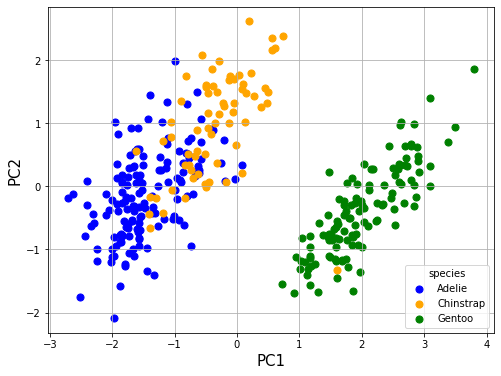

In [89]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)

finalDf = pd.concat([p_df, df[['species']]], axis = 1)
specie = ['Adelie', 'Chinstrap', 'Gentoo']
colors = ['b', 'orange', 'g']
for species, color in zip(specie, colors):
    indicesToKeep = finalDf['species'] == species
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(specie, loc='lower right',title = 'species')
ax.grid()

## 🔥 도전 과제

### "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?


In [22]:
# 이곳에 답안을 작성하시기 바랍니다